# **Credit Risk Prediction Model**

ID/X Partners Internship Project - DATA SCIENTIST

Nama : Indri Windriasari




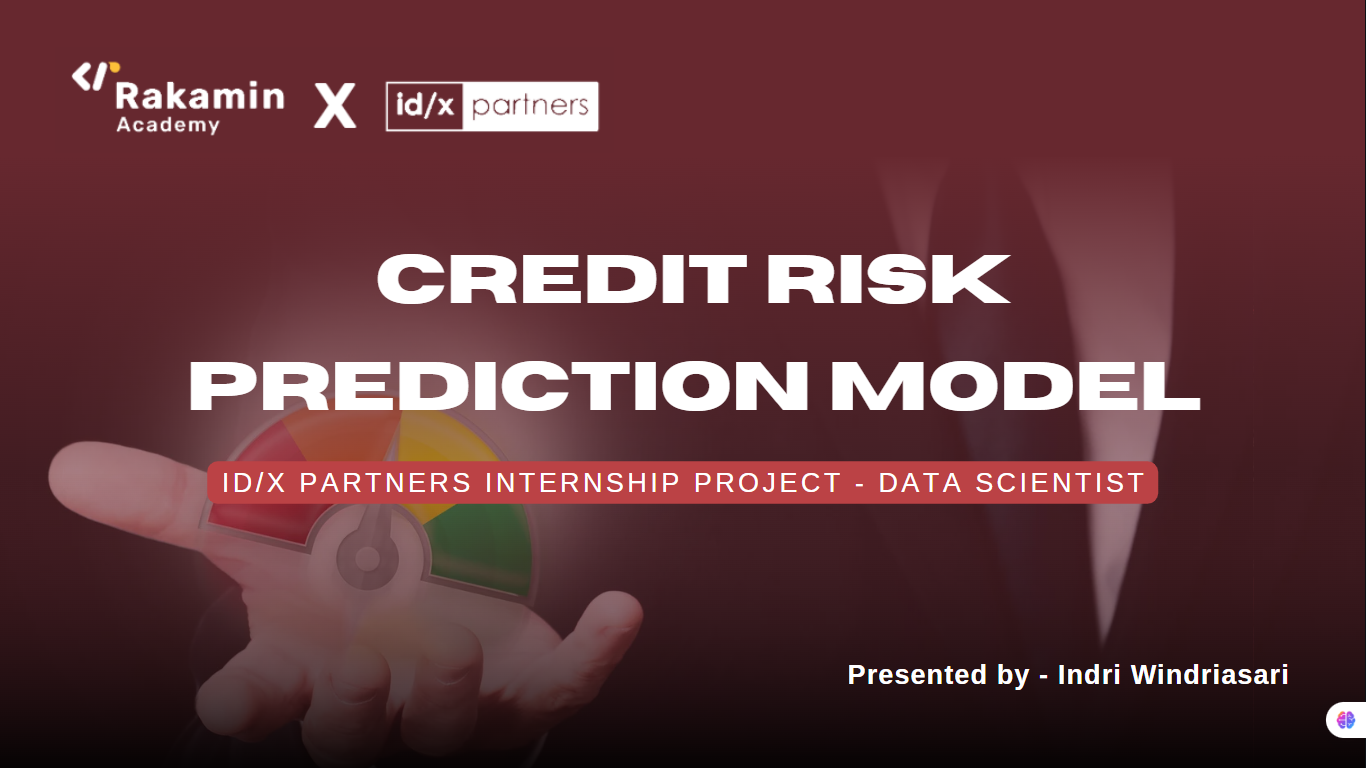

**Kredit Konsumer & Risiko Kredit di Industri Keuangan**

Proyek ini berada dalam domain risk analytics untuk pinjaman individual/konsumer pada sektor keuangan (multifinance). Fokus utama proyek ini adalah untuk memprediksi risiko gagal bayar (default) berdasarkan data historis riwayat kredit nasabah.

# **Business Understanding**

Perusahaan jasa keuangan (multifinance) perlu meminimalkan risiko kerugian akibat gagal bayar dari nasabah. Oleh karena itu, penting untuk mengembangkan sistem penilaian risiko yang mampu mendeteksi sejak awal apakah calon debitur memiliki potensi default atau tidak.

Sebagai Data Scientist Intern di ID/X Partners, saya bertugas untuk:

- Mengolah dan menganalisis data kredit historis.

- Mengembangkan model prediktif yang mampu membedakan nasabah yang cenderung membayar dengan lancar vs. nasabah yang berpotensi gagal bayar.

- Memberikan insight bisnis dari hasil analisis data.

**Bagaimana cara memanfaatkan data historis kredit untuk memprediksi apakah seorang nasabah akan mengalami gagal bayar, guna mendukung pengambilan keputusan kredit yang lebih akurat dan efisien?**

🎯 **Business Goals**:
- Meningkatkan efektivitas sistem penilaian kredit.

- Menurunkan tingkat Non-Performing Loan (NPL).

- Memberikan rekomendasi data-driven dalam proses approval pinjaman.

🎯 **Data Science Goals**:
- Membangun model klasifikasi yang dapat memprediksi apakah peminjam akan gagal bayar atau tidak.

- Mengidentifikasi fitur-fitur utama yang paling berkontribusi terhadap risiko gagal bayar.

- Menyediakan interpretasi model yang mudah dipahami oleh tim bisnis atau manajemen risiko.

# **Data Loading**


In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [130]:
df = pd.read_csv('/content/drive/MyDrive/PBI - Data Scientist/loan_data_2007_2014.csv')
df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**Data Understanding**

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## **Ringkasan Dataset**
Dataset yang digunakan dalam proyek ini adalah Loan Dataset (2007-2014) yang berasal dari platform pinjaman online yang berisi data historis peminjaman dana dari tahun 2007 hingga 2014. Dataset  mencakup informasi rinci terkait profil peminjam, rincian pinjaman, kondisi keuangan, dan status pembayaran pinjaman.

- Jumlah baris: 466285

- Jumlah kolom: 75

- Target variabel: `loan_status`. Akan dikonversi menjadi label biner:

  - 0 = Tidak gagal bayar (Fully Paid)

  - 1 = Gagal bayar (Charged Off)

In [132]:
df.shape

(466285, 75)

In [133]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Beberapa fitur penting dalam dataset ini meliputi:

`loan_amnt`: Jumlah dana pinjaman yang diajukan.

`term`: Jangka waktu pinjaman (misalnya 36 atau 60 bulan).

`int_rate`: Tingkat bunga pinjaman.

`installment`: Jumlah cicilan bulanan

`grade` dan `sub_grade`: Kategori risiko kredit yang diberikan.

`emp_length`: Lama bekerja peminjam dalam tahun.

`home_ownership`: Status kepemilikan rumah (RENT, OWN, MORTGAGE).

`annual_inc`: Pendapatan tahunan peminjam.

`purpose`: Tujuan pinjaman (debt_consolidation, small_business, dll.)

`dti`: Debt-to-Income ratio

`delinq_2yrs`: Jumlah keterlambatan pembayaran > 30 hari dalam 2 tahun terakhir

`revol_util`: Persentase pemakaian kredit revolving

`earliest_cr_line` dan `issue_d`: Tanggal awal kredit dan tanggal pinjaman diterbitkan (dipakai untuk menghitung umur kredit).

`total_acc`: Jumlah total akun kredit yang dimiliki

`loan_status`: Status pinjaman yang menjadi target variabel, di mana pinjaman dapat berstatus lancar, terlambat, atau gagal bayar.


In [134]:
def explore(df):
  """
    Fungsi ini digunakan untuk melakukan eksplorasi awal pada dataset yang diberikan dan memberikan informasi penting tentang setiap kolom dalam DataFrame, seperti:
      - Tipe data setiap kolom.
      - Persentase nilai yang hilang di setiap kolom.
      - Jumlah nilai unik yang ada di setiap kolom.
      - Daftar nilai unik dari setiap kolom.
  """
  with pd.option_context("display.max_colwidth", 20):
    info = pd.DataFrame()
    info['data type'] = df.dtypes
    info['percentage missing'] = df.isnull().sum()*100/len(df)
    info['number of unique'] = df.apply(lambda x: len(x.unique()))
    info['unique values'] = df.apply(lambda x: x.unique())
  return info.sort_values('data type')

In [135]:
explore(df)

,data type,percentage missing,number of unique,unique values
Unnamed: 0,int64,0.000000,466285,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
id,int64,0.000000,466285,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
member_id,int64,0.000000,466285,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
loan_amnt,int64,0.000000,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,int64,0.000000,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
revol_bal,int64,0.000000,58142,"[13648, 1687, 2956, 5598, 27783, 7963, 17726, ..."
policy_code,int64,0.000000,1,[1]
dti_joint,float64,100.000000,1,[nan]
annual_inc_joint,float64,100.000000,1,[nan]
mths_since_last_major_derog,float64,78.773926,163,"[nan, 53.0, 34.0, 54.0, 69.0, 7.0, 16.0, 71.0,..."


# Data Preprocessing

`Unnamed`: 0 → indeks, bisa di-drop.

`id`, `member_id` → ID unik, tidak berguna untuk prediksi, drop.

`url` → berisi tautan, drop.

`desc` → teks tidak terstruktur dan banyak missing (72.98%), drop.

`emp_title` → 5.9% missing dan sangat banyak nilai unik (205k+), bisa drop jika tidak diproses NLP.

In [136]:
# Daftar kolom yang ingin dihapus
useless_cols = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'emp_title']

# Drop kolom dari DataFrame jika ada
df = df.drop(columns=[col for col in useless_cols if col in df.columns])


Kolom dengan hanya 1 Nilai Unik dihapus karena tidak menambah nilai informasi, tidak membantu model mempelajari pola, dan menambah kompleksitas dan dimensi data secara tidak perlu.

`policy_code` →	1 nilai unik yaitu [1]

`application_type`	→ nilai unik yaitu [INDIVIDUAL]

In [137]:
df.drop(columns=['policy_code', 'application_type'], inplace=True)

## Missing Value

Missing value = 100%

In [138]:
full_non_null = [col for col in df.columns if df[col].isnull().all()]
print(full_non_null)

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [139]:
print(len(full_non_null),'column(s)')

17 column(s)


Terdapat 17 kolom dengan missing value sebanyak 100%. Maka perlu dihilangkan/dihapus

In [140]:
df = df.drop(axis=1, columns=full_non_null) # handling missing value (menghapus)

In [141]:
df.shape

(466285, 50)

In [142]:
explore(df)

,data type,percentage missing,number of unique,unique values
loan_amnt,int64,0.000000,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,int64,0.000000,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
revol_bal,int64,0.000000,58142,"[13648, 1687, 2956, 5598, 27783, 7963, 17726, ..."
open_acc,float64,0.006219,63,"[3.0, 2.0, 10.0, 15.0, 9.0, 7.0, 4.0, 11.0, 14..."
pub_rec,float64,0.006219,27,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, 6.0, 9.0, ..."
revol_util,float64,0.072917,1270,"[83.7, 9.4, 98.5, 21.0, 53.9, 28.3, 85.6, 87.5..."
total_acc,float64,0.006219,113,"[9.0, 4.0, 10.0, 37.0, 38.0, 12.0, 11.0, 13.0,..."
out_prncp,float64,0.000000,135665,"[0.0, 766.9, 1889.15, 2695.31, 3193.13, 2462.2..."
out_prncp_inv,float64,0.000000,141189,"[0.0, 766.9, 1889.15, 2688.53, 3186.72, 2455.3..."
total_pymnt,float64,0.000000,351609,"[5861.071414, 1008.71, 3003.653644, 12226.3022..."


Mengetahui persentase missing value dari yang terbesar

In [143]:
percent_missing = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
missing_value_df = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

In [144]:
missing_value_df.head(12)

,data_type,percent_missing
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
mths_since_last_delinq,float64,53.690554
next_pymnt_d,object,48.728567
tot_coll_amt,float64,15.071469
tot_cur_bal,float64,15.071469
total_rev_hi_lim,float64,15.071469
emp_length,object,4.505399
last_pymnt_d,object,0.080637
revol_util,float64,0.072917


- Missing values > 50%:

  `mths_since_last_record` = Jumlah bulan sejak catatan publik terakhir

  `mths_since_last_major_derog` = Jumlah bulan sejak peringkat 90 hari terakhir atau peringkat yang lebih buruk

  `mths_since_last_delinq` = Jumlah bulan sejak tunggakan terakhir peminjam


- Missing values 35% - 50%:

  `next_payment_d` = Pembayaran bulan terakhir yang diterima


- Missing values 1% - 20%

  `tot_cur_bal` = Total saldo saat ini dari semua akun

  `total_rev_hi_lim` = Total kredit bergulir yang tinggi/pagu kredit

  `tot_coll_amt` = Total jumlah penagihan yang pernah terutang

  `emp_length` = Lama bekerja dalam tahun. Nilai yang dapat diberikan adalah antara 0 dan 10 dimana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih.

In [145]:
import pandas as pd
import numpy as np

# Misal df adalah DataFrame utama
def preprocess_loan_data(df):
    # 1. Drop columns with > 50% missing values
    df = df.drop(columns=[
        'mths_since_last_record',
        'mths_since_last_major_derog'
    ], errors='ignore')

    # 2. Drop 'next_payment_d' (35-50% missing)
    df = df.drop(columns=['next_pymnt_d'], errors='ignore')

    # 3. Handle mths_since_last_delinq (50% missing) → fill + add flag
    if 'mths_since_last_delinq' in df.columns:
        df['has_delinquency'] = df['mths_since_last_delinq'].notna().astype(int)
        df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(100)

    # 4. Fill 'tot_cur_bal', 'total_rev_hi_lim' with median or 0
    for col in ['tot_cur_bal', 'total_rev_hi_lim']:
        if col in df.columns:
            df[col] = df[col].median()

    # 5. Fill 'tot_coll_amt' with 0
    if 'tot_coll_amt' in df.columns:
        df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)

    # 6. Handle emp_length
    if 'emp_length' in df.columns:
        # Clean and convert to numeric
        df['emp_length'] = df['emp_length'].astype(str).str.extract(r'(\d+)').astype(float)
        df['emp_length'] = df['emp_length'].fillna(-1)  # -1 for 'Unknown'

    return df


In [146]:
df = preprocess_loan_data(df)

In [147]:
df.shape

(466285, 48)

In [100]:
# # Konversi kolom tanggal ke datetime
# date_cols = ['issue_d', 'last_pymnt_d', 'earliest_cr_line', 'last_credit_pull_d']
# for col in date_cols:
#     df[col] = pd.to_datetime(df[col], format='%b-%Y', errors='coerce')

In [148]:
from dateutil.relativedelta import relativedelta

# Coba parse dengan format yang sesuai
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y', errors='coerce')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y', errors='coerce')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y', errors='coerce')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y', errors='coerce')


# Hitung jumlah bulan antara issue_d dan last_pymnt_d
def calculate_month_diff(row):
    if pd.isna(row['issue_d']) or pd.isna(row['last_pymnt_d']):
        return np.nan
    delta = relativedelta(row['last_pymnt_d'], row['issue_d'])
    return delta.years * 12 + delta.months

df['pymnt_time'] = df.apply(calculate_month_diff, axis=1)

# Hitung jumlah tahun antara earliest_cr_line dan last_credit_pull_d
def calculate_year_diff(row):
    if pd.isna(row['earliest_cr_line']) or pd.isna(row['last_credit_pull_d']):
        return np.nan
    delta = relativedelta(row['last_credit_pull_d'], row['earliest_cr_line'])
    return round(delta.years + delta.months / 12, 1)

df['credit_pull_year'] = df.apply(calculate_year_diff, axis=1)


In [149]:
df.shape

(466285, 50)

In [150]:
explore(df)

,data type,percentage missing,number of unique,unique values
loan_amnt,int64,0.000000,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,int64,0.000000,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
has_delinquency,int64,0.000000,2,"[0, 1]"
revol_bal,int64,0.000000,58142,"[13648, 1687, 2956, 5598, 27783, 7963, 17726, ..."
revol_util,float64,0.072917,1270,"[83.7, 9.4, 98.5, 21.0, 53.9, 28.3, 85.6, 87.5..."
total_acc,float64,0.006219,113,"[9.0, 4.0, 10.0, 37.0, 38.0, 12.0, 11.0, 13.0,..."
out_prncp,float64,0.000000,135665,"[0.0, 766.9, 1889.15, 2695.31, 3193.13, 2462.2..."
out_prncp_inv,float64,0.000000,141189,"[0.0, 766.9, 1889.15, 2688.53, 3186.72, 2455.3..."
total_pymnt,float64,0.000000,351609,"[5861.071414, 1008.71, 3003.653644, 12226.3022..."
total_pymnt_inv,float64,0.000000,347659,"[5831.78, 1008.71, 3003.65, 12226.3, 3242.17, ..."


Drop Unused Columns

Ada beberapa kolom yang berisiko tinggi menimbulkan kebocoran data (data leakage) atau tidak informatif

In [151]:
drop_columns = [
    'title',                    # mirip dengan 'purpose'
    'zip_code',                 # granular dan tidak informatif
    'last_pymnt_d',             # terjadi setelah pinjaman diberikan
    'last_credit_pull_d',       # terjadi setelah pinjaman diberikan
    'earliest_cr_line',         # perlu diproses sebagai tahun
    'issue_d',                  # bisa jadi leakage
    'out_prncp',                # status pembayaran saat ini
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_amnt',          # semua ini terjadi **setelah** pinjaman
]

df = df.drop(columns=drop_columns)

In [152]:
# Imputasi missing <1%
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

In [153]:
df.shape

(466285, 34)

In [154]:
explore(df)

,data type,percentage missing,number of unique,unique values
loan_amnt,int64,0.0,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,int64,0.0,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
has_delinquency,int64,0.0,2,"[0, 1]"
revol_bal,int64,0.0,58142,"[13648, 1687, 2956, 5598, 27783, 7963, 17726, ..."
total_rev_hi_lim,float64,0.0,1,[22800.0]
tot_cur_bal,float64,0.0,1,[81539.0]
tot_coll_amt,float64,0.0,6321,"[0.0, 15386.0, 1514.0, 154.0, 539.0, 92.0, 152..."
acc_now_delinq,float64,0.0,6,"[0.0, 1.0, 2.0, 3.0, 5.0, 4.0]"
collections_12_mths_ex_med,float64,0.0,9,"[0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 16.0, 20.0, 5.0]"
total_acc,float64,0.0,112,"[9.0, 4.0, 10.0, 37.0, 38.0, 12.0, 11.0, 13.0,..."


## Duplicated Data

In [155]:
df.duplicated().sum()

np.int64(0)

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [157]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

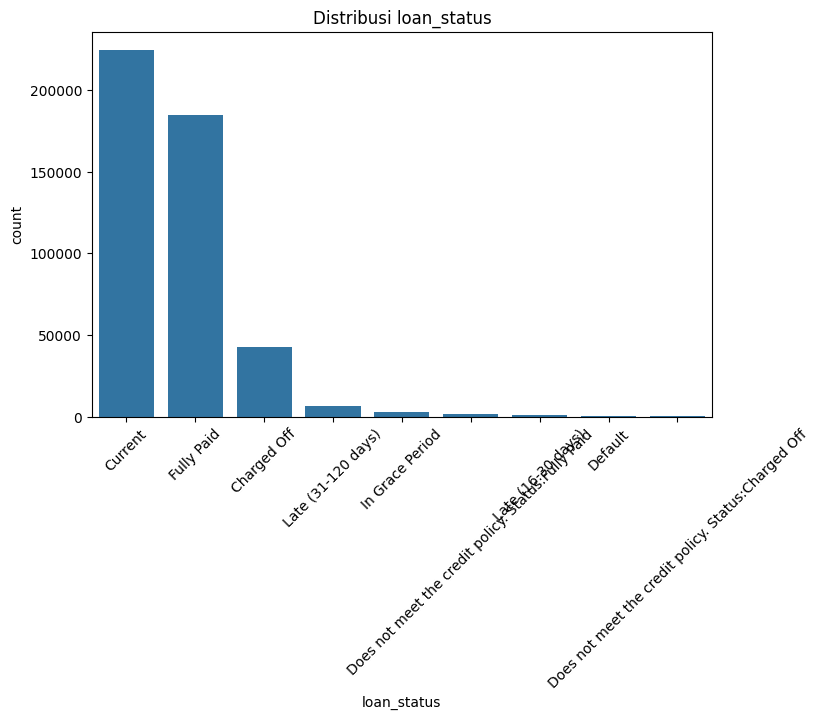

In [158]:
# Visualisasi distribusi target loan_status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.title('Distribusi loan_status')
plt.xticks(rotation=45)
plt.show()

In [159]:
def categorize_loan_status(status):
    good_status = ['Fully Paid',
                   'Does not meet the credit policy. Status:Fully Paid',
                   'Current',
                   'In Grace Period']
    bad_status = ['Charged Off',
                  'Default',
                  'Late (31-120 days)',
                  'Late (16-30 days)',
                  'Does not meet the credit policy. Status:Charged Off']

    if status in good_status:
        return 0  # Good Loan
    elif status in bad_status:
        return 1  # Bad Loan
    else:
        return None  # Kalau ada status lain, bisa set jadi None atau drop nanti

# Terapkan ke dataframe
df['loan_status'] = df['loan_status'].apply(categorize_loan_status)


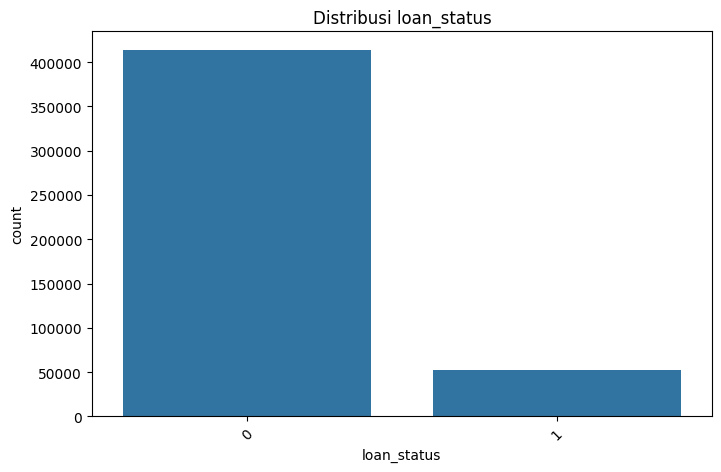

In [160]:
# Visualisasi distribusi target loan_status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.title('Distribusi loan_status')
plt.xticks(rotation=45)
plt.show()

In [161]:
# Cek hasil
print(df['loan_status'].value_counts(dropna=False))

loan_status
0    414099
1     52186
Name: count, dtype: int64


In [162]:
# Check imbalance secara proporsi
print("Proporsi loan_status:")
print(df['loan_status'].value_counts(normalize=True))

Proporsi loan_status:
loan_status
0    0.888081
1    0.111919
Name: proportion, dtype: float64


In [163]:
df.shape

(466285, 34)

In [164]:
# Feature engineering dari emp_length
if 'emp_length' in df.columns:
    df['emp_length'] = df['emp_length'].replace({'10+ years': '10',
                                                 '9 years': '9', '8 years': '8',
                                                 '7 years': '7', '6 years': '6',
                                                 '5 years': '5', '4 years': '4',
                                                 '3 years': '3', '2 years': '2',
                                                 '1 year': '1', '< 1 year': '0.5',
                                                 'n/a': np.nan})
    df['emp_length'] = df['emp_length'].astype(float)
    df['emp_bin'] = pd.cut(df['emp_length'].fillna(0), bins=[-1, 1, 5, 10, np.inf], labels=['<1yr', '1-5yr', '5-10yr', '10+yr'])
    df = pd.get_dummies(df, columns=['emp_bin'], drop_first=True)

In [165]:
explore(df)

,data type,percentage missing,number of unique,unique values
emp_bin_10+yr,bool,0.0,1,[False]
emp_bin_1-5yr,bool,0.0,2,"[False, True]"
emp_bin_5-10yr,bool,0.0,2,"[True, False]"
has_delinquency,int64,0.0,2,"[0, 1]"
revol_bal,int64,0.0,58142,"[13648, 1687, 2956, 5598, 27783, 7963, 17726, ..."
loan_status,int64,0.0,2,"[0, 1]"
loan_amnt,int64,0.0,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,int64,0.0,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
pub_rec,float64,0.0,26,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 8.0, ..."
credit_pull_year,float64,0.0,602,"[31.0, 14.4, 14.2, 18.9, 20.0, 10.8, 10.5, 7.9..."


In [167]:
# DROPPING FITUR YANG TIDAK DIGUNAKAN
drop_features = [
    'total_rev_hi_lim', 'tot_cur_bal', 'addr_state', 'emp_length'
    # tambahkan 'mths_since_last_delinq'
]

df = df.drop(columns=drop_features, errors='ignore')

In [168]:
df.shape

(466285, 33)

In [169]:
explore(df)

,data type,percentage missing,number of unique,unique values
emp_bin_10+yr,bool,0.0,1,[False]
emp_bin_1-5yr,bool,0.0,2,"[False, True]"
emp_bin_5-10yr,bool,0.0,2,"[True, False]"
has_delinquency,int64,0.0,2,"[0, 1]"
revol_bal,int64,0.0,58142,"[13648, 1687, 2956, 5598, 27783, 7963, 17726, ..."
loan_status,int64,0.0,2,"[0, 1]"
loan_amnt,int64,0.0,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
funded_amnt,int64,0.0,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
pub_rec,float64,0.0,26,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 8.0, ..."
credit_pull_year,float64,0.0,602,"[31.0, 14.4, 14.2, 18.9, 20.0, 10.8, 10.5, 7.9..."


In [172]:
# Ambil hanya kolom numerik yang relevan (drop 1-value columns dan object)
numerics = df.select_dtypes(include=['int64', 'float64', 'bool']).copy()

In [173]:
# Drop kolom dengan unique value hanya 1
numerics = numerics.loc[:, numerics.nunique() > 1]

In [174]:
# Correlation matrix
corr = numerics.corr()

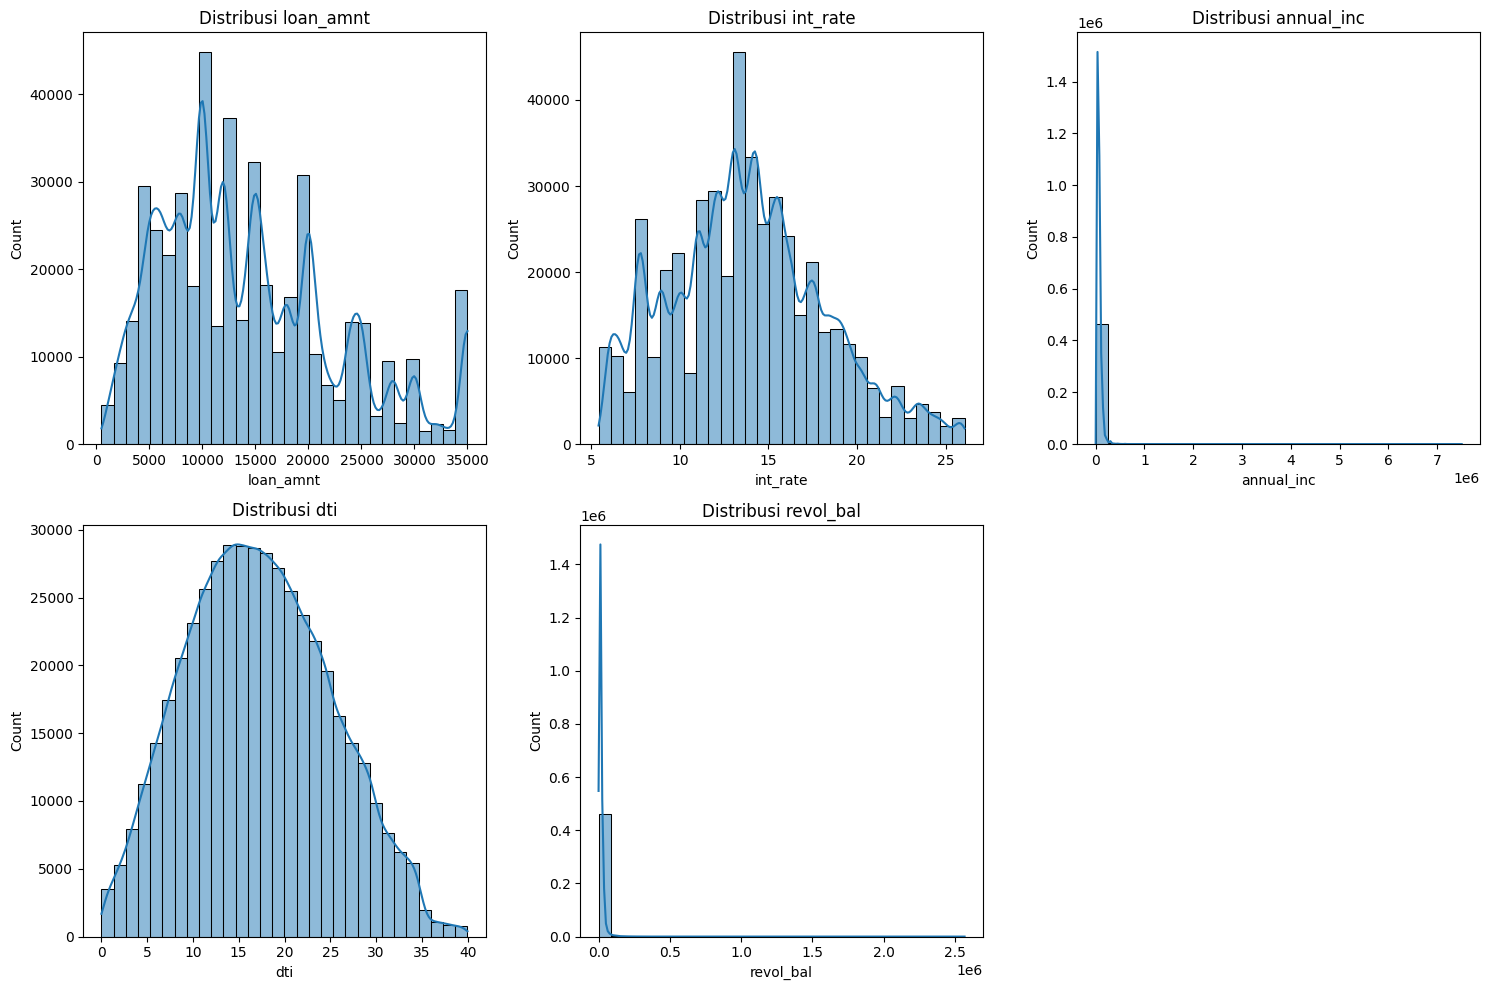

In [ ]:
# Distribusi fitur numerik utama
num_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal']
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

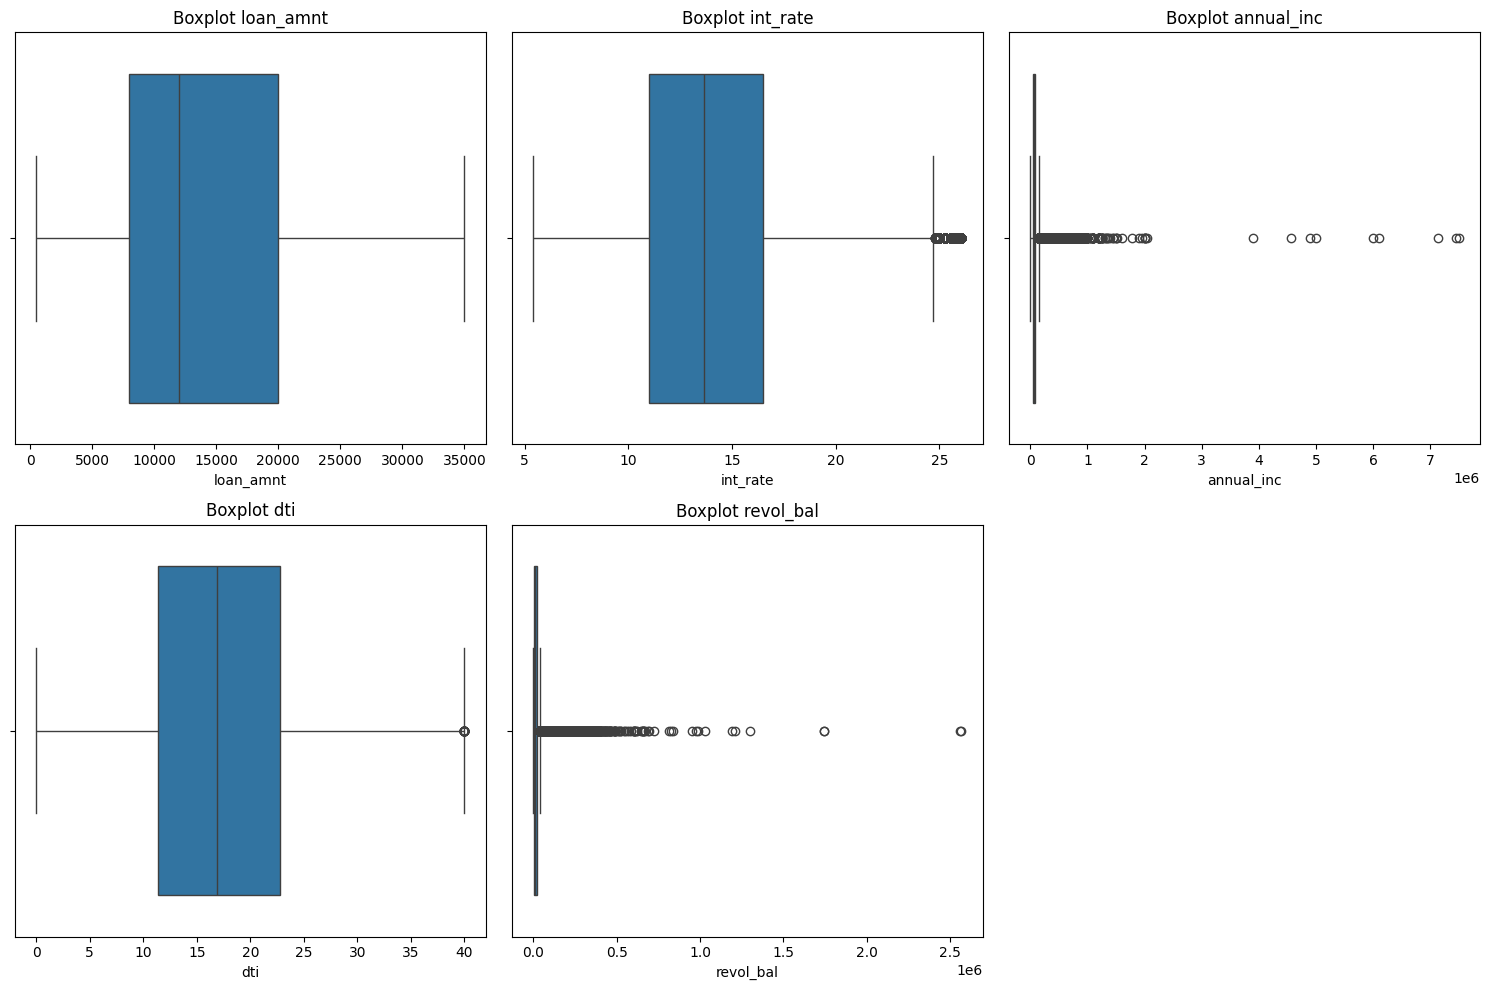

In [ ]:
# Boxplot fitur numerik utama untuk lihat outlier dan distribusi
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

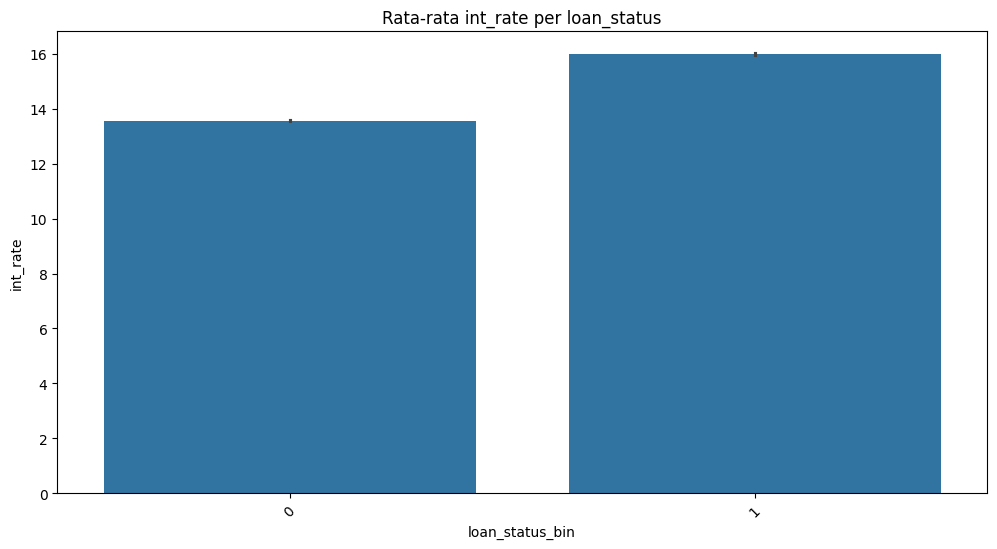

In [ ]:
# Hubungan fitur dengan target (mean nilai fitur per kategori loan_status)
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='loan_status_bin', y='int_rate', order=df['loan_status_bin'].value_counts().index)
plt.title('Rata-rata int_rate per loan_status')
plt.xticks(rotation=45)
plt.show()

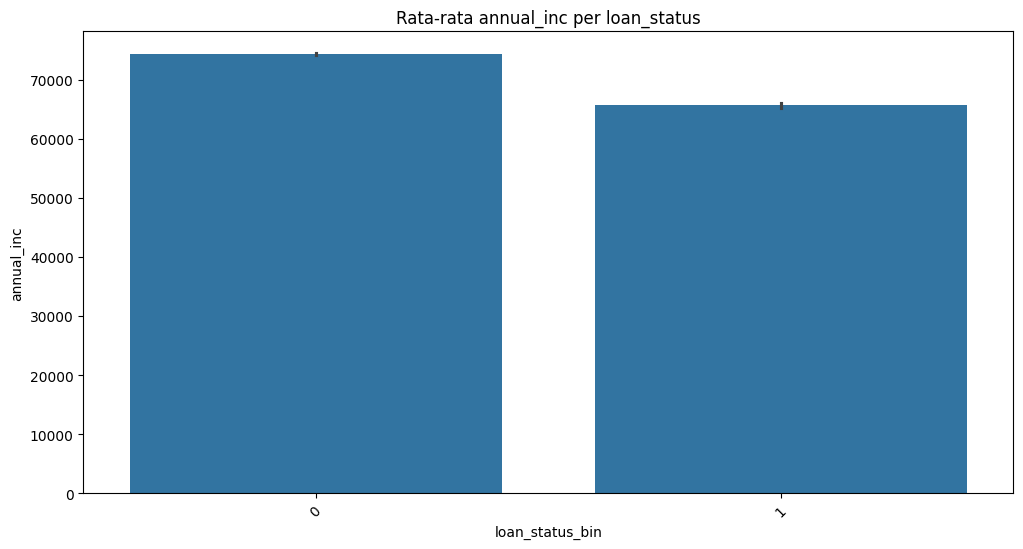

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='loan_status_bin', y='annual_inc', order=df['loan_status_bin'].value_counts().index)
plt.title('Rata-rata annual_inc per loan_status')
plt.xticks(rotation=45)
plt.show()

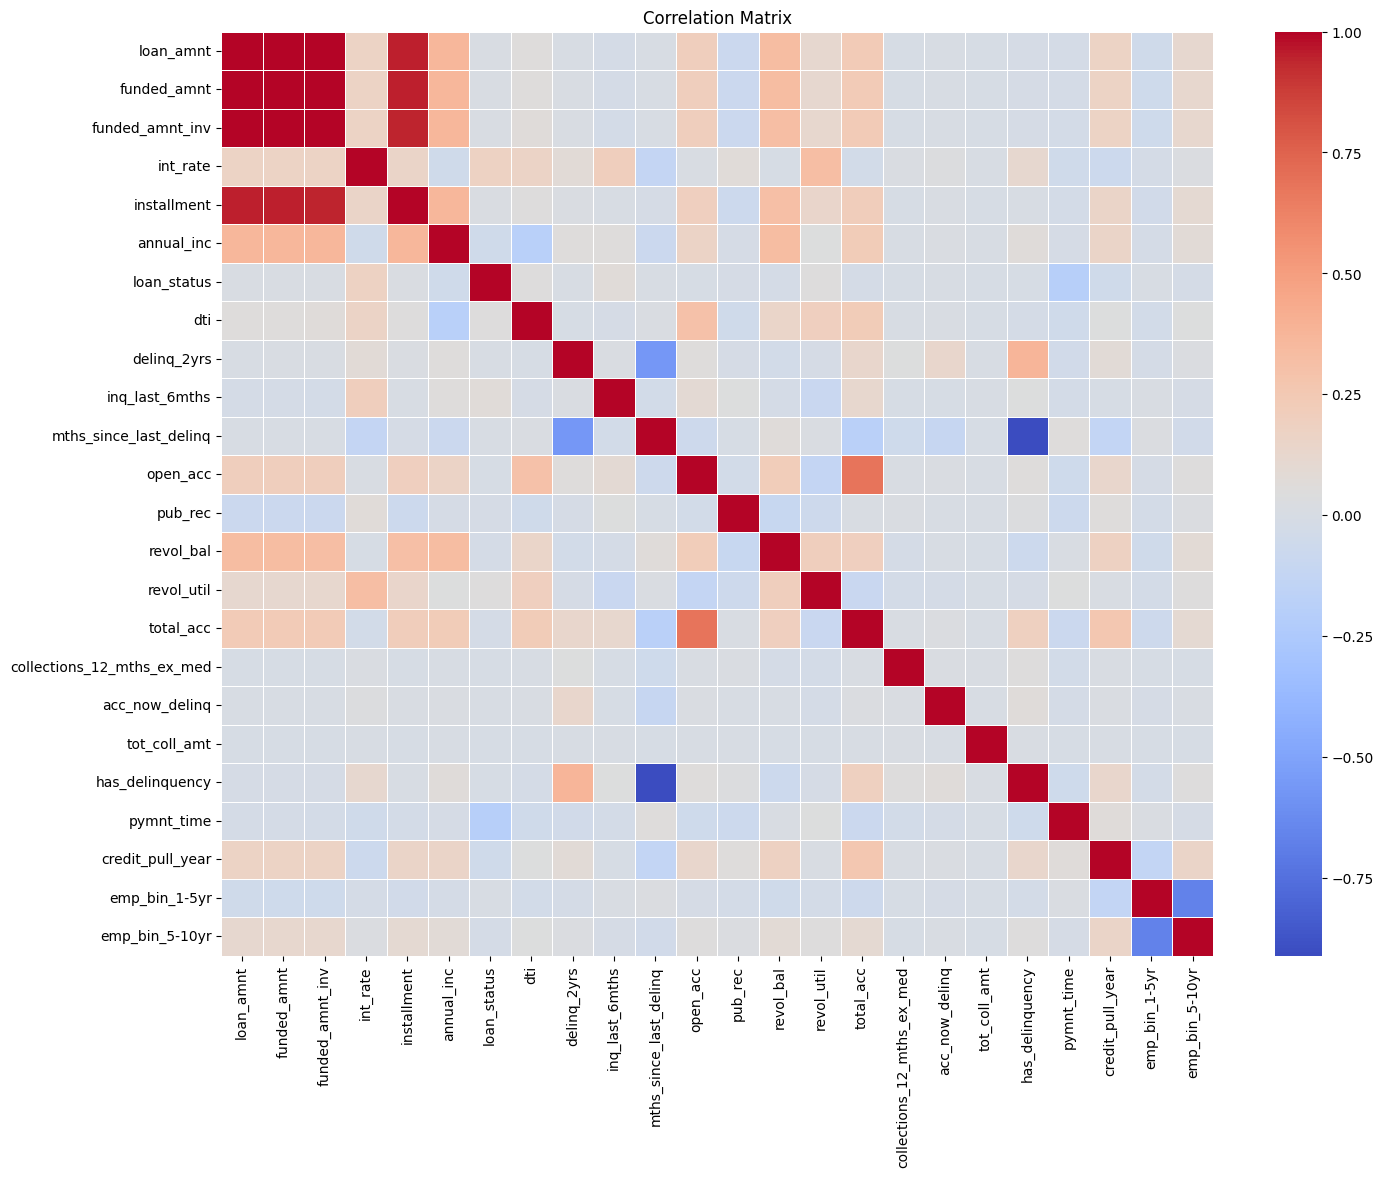

In [175]:
# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [178]:
# Target
y = df['loan_status']  # 0 = good, 1 = bad

# Selected Features
selected_features = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'inq_last_6mths', 'mths_since_last_delinq', 'has_delinquency',
    'revol_util', 'emp_bin_1-5yr', 'emp_bin_5-10yr',
    'term', 'grade', 'home_ownership', 'verification_status', 'purpose'
]

X = df[selected_features].copy()

In [179]:
# Ubah kolom biner ke int
X['has_delinquency'] = X['has_delinquency'].astype(int)
X['emp_bin_1-5yr'] = X['emp_bin_1-5yr'].astype(int)
X['emp_bin_5-10yr'] = X['emp_bin_5-10yr'].astype(int)

In [180]:
# Tipe fitur
numeric_features = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc',
    'dti', 'inq_last_6mths', 'mths_since_last_delinq',
    'revol_util', 'has_delinquency', 'emp_bin_1-5yr', 'emp_bin_5-10yr'
]

In [184]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [185]:
ordinal_features = ['grade']  # A < B < ... < G
ordinal_categories = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]

categorical_features = ['term', 'home_ownership', 'verification_status', 'purpose']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)

In [192]:
from sklearn.pipeline import Pipeline

In [193]:
from xgboost import XGBClassifier

In [194]:
# Final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [199]:

# Train
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['loan_amnt', 'int_rate',
                                                   'installment', 'annual_inc',
                                                   'dti', 'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'revol_util',
                                                   'has_delinquency',
                                                   'emp_bin_1-5yr',
                                                   'emp_bin_5-10yr']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E',
                                                                              'F',
                                                                              'G']]),
                                                  ['grade']),
                                                 ('cat',
                                                  OneHotEncoder...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [200]:
# Predict
y_pred = pipeline.predict(X_test)



In [202]:
from sklearn.metrics import classification_report, confusion_matrix

In [203]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[82750    70]
 [10387    50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     82820
           1       0.42      0.00      0.01     10437

    accuracy                           0.89     93257
   macro avg       0.65      0.50      0.48     93257
weighted avg       0.84      0.89      0.84     93257

